In [1]:
import pandas as pd
import numpy as np

In [2]:
# packages for path locations
import os
import sys

In [3]:
# package scripts in the script module folder 
sys.path.insert(0,'../scripts/')
from data_exploration import exploration
from data_preprocessing import data_preProcessing_script

In [4]:
#importing the some libraries for the project
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import *
import warnings
warnings.filterwarnings('ignore')

In [9]:
#Reading the clean data csv sheet
df=pd.read_csv('../data/cleaned_telecom_data.csv')
df.head()

,MSISDN/Number,no.of xDR sessions,Total Uploads,Total Downloads,Total UL and DL,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,...,Avg Delay (ms),Dur. (ms),Dur. (ms).1,Activity_Duration(ms),Avg Throughput (kbps),Handset Manufacturer,Handset Type,Last Location Name,IMSI,IMEI
0,3.360100e+10,1,3.674974e+13,4.806241e+14,5.173738e+14,1.835594e+13,2.905912e+12,3.701304e+12,1.570185e+12,1.785519e+13,...,47.0,1823652.0,1.823653e+09,76411.0,67.0,Samsung,Samsung Galaxy A5 Sm-A520F,9164566995485190,2.082014e+14,3.552121e+13
1,3.360100e+10,1,5.380039e+13,1.180289e+15,1.234090e+15,3.935912e+13,4.414096e+12,9.373850e+11,1.933278e+12,3.556554e+13,...,70.0,1365104.0,1.365104e+09,3728.0,42.0,Samsung,Samsung Galaxy J5 (Sm-J530),L77566A,2.082019e+14,3.579401e+13
2,3.360100e+10,1,2.788364e+13,6.904999e+14,7.183836e+14,3.442524e+13,1.022912e+13,3.363124e+12,1.726277e+12,2.375120e+13,...,70.0,1361762.0,1.361763e+09,0.0,15.0,Samsung,Samsung Galaxy A8 (2018),D42335A,2.082003e+14,3.528151e+13
3,3.360101e+10,1,4.332422e+13,1.595068e+15,1.638393e+15,3.653476e+13,1.181176e+13,2.070983e+12,6.574930e+11,1.509259e+13,...,70.0,1321509.0,1.321510e+09,41212.0,88.0,undefined,undefined,T21824A,2.082014e+14,3.535661e+13
4,3.360101e+10,2,3.854281e+13,1.119848e+15,1.158391e+15,3.422225e+13,7.748843e+12,2.110349e+12,9.127880e+11,1.753980e+13,...,70.0,1089009.0,1.089009e+09,0.0,15.0,Samsung,Samsung Sm-G390F,D88865A,2.082014e+14,3.540701e+13


In [10]:
df._get_numeric_data().columns

Index(['MSISDN/Number', 'no.of xDR sessions', 'Total Uploads',
       'Total Downloads', 'Total UL and DL', 'Youtube_Total_Data',
       'Google_Total_Data', 'Email_Total_Data', 'Social_Media_Total_Data',
       'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data',
       'Start ms', 'End ms', 'Avg Delay (ms)', 'Dur. (ms)', 'Dur. (ms).1',
       'Activity_Duration(ms)', 'Avg Throughput (kbps)', 'IMSI', 'IMEI'],
      dtype='object')

# Catagorical data

In [11]:
cols = df.columns

In [12]:
numer_cols = df._get_numeric_data().columns

In [13]:
list(set(cols) - set(numer_cols))

['Start', 'End', 'Handset Manufacturer', 'Last Location Name', 'Handset Type']

In [14]:
cols = ['IMSI','Handset Manufacturer','Handset Type','IMEI','MSISDN/Number','Last Location Name']

In [15]:
try:
    for col in cols:
        df[col] = df[col].astype('category')
except:
    print("can't change to categorycal")

In [16]:
cols = df.columns

In [17]:
numer_cols = df._get_numeric_data().columns
list(set(cols) - set(numer_cols))

['Start',
 'IMSI',
 'End',
 'IMEI',
 'Handset Manufacturer',
 'Last Location Name',
 'MSISDN/Number',
 'Handset Type']

# Data Exploration

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8747 entries, 0 to 8746
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   MSISDN/Number            8747 non-null   category
 1   no.of xDR sessions       8747 non-null   int64   
 2   Total Uploads            8747 non-null   float64 
 3   Total Downloads          8747 non-null   float64 
 4   Total UL and DL          8747 non-null   float64 
 5   Youtube_Total_Data       8747 non-null   float64 
 6   Google_Total_Data        8747 non-null   float64 
 7   Email_Total_Data         8747 non-null   float64 
 8   Social_Media_Total_Data  8747 non-null   float64 
 9   Netflix_Total_Data       8747 non-null   float64 
 10  Gaming_Total_Data        8747 non-null   float64 
 11  Other_Total_Data         8747 non-null   float64 
 12  Start ms                 8747 non-null   float64 
 13  End ms                   8747 non-null   float64 
 14  Start   

In [19]:
inform = data_preProcessing_script(df)
inform.show_data_description()

,no.of xDR sessions,Total Uploads,Total Downloads,Total UL and DL,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Start ms,End ms,Avg Delay (ms),Dur. (ms),Dur. (ms).1,Activity_Duration(ms),Avg Throughput (kbps)
count,8747.000000,8.747000e+03,8.747000e+03,8.747000e+03,8.747000e+03,8.747000e+03,8.747000e+03,8.747000e+03,8.747000e+03,8.747000e+03,8.747000e+03,8747.000000,8747.000000,8747.000000,8.747000e+03,8.747000e+03,8.747000e+03,8747.000000
mean,1.339088,4.086428e+13,8.754750e+14,9.163393e+14,2.252466e+13,7.857836e+12,2.259609e+12,1.840155e+12,2.240898e+13,4.288084e+14,4.306397e+14,498.796159,500.545101,147.237339,7.288751e+04,7.288809e+07,5.809015e+06,25731.311535
std,0.718915,1.121431e+13,3.417736e+14,3.419210e+14,9.179092e+12,3.518412e+12,1.072008e+12,1.030364e+12,9.215411e+12,2.432991e+14,2.413396e+14,288.558634,286.483115,770.102744,6.458303e+04,6.458305e+07,1.305279e+07,31531.238981
min,1.000000,6.243519e+12,3.303636e+13,8.990077e+13,6.578440e+11,1.295180e+11,2.675000e+10,5.441000e+09,1.864600e+11,1.552874e+12,2.451224e+12,0.000000,0.000000,13.000000,2.729400e+04,2.729475e+07,0.000000e+00,0.000000
25%,1.000000,3.282462e+13,6.288930e+14,6.687916e+14,1.595518e+13,4.963092e+12,1.361233e+12,9.581310e+11,1.581271e+13,2.211153e+14,2.186194e+14,250.000000,255.000000,45.000000,4.739150e+04,4.739164e+07,4.467550e+04,115.000000
50%,1.000000,4.076839e+13,8.743438e+14,9.155821e+14,2.250168e+13,7.904975e+12,2.265204e+12,1.849296e+12,2.247118e+13,4.302372e+14,4.337532e+14,497.000000,503.000000,67.000000,6.294300e+04,6.294348e+07,7.743170e+05,14877.000000
75%,2.000000,4.882172e+13,1.123660e+15,1.163781e+15,2.906280e+13,1.074233e+13,3.164643e+12,2.731996e+12,2.902785e+13,6.404488e+14,6.398706e+14,748.000000,747.000000,114.000000,8.639900e+04,8.639995e+07,5.271023e+06,42293.000000
max,17.000000,7.309782e+13,1.712016e+15,1.762451e+15,4.495095e+13,1.550645e+13,4.497701e+12,3.647484e+12,4.490332e+13,8.589021e+14,8.584707e+14,999.000000,999.000000,54848.000000,1.823652e+06,1.823653e+09,1.720238e+08,230049.000000


# Univariant Analysis

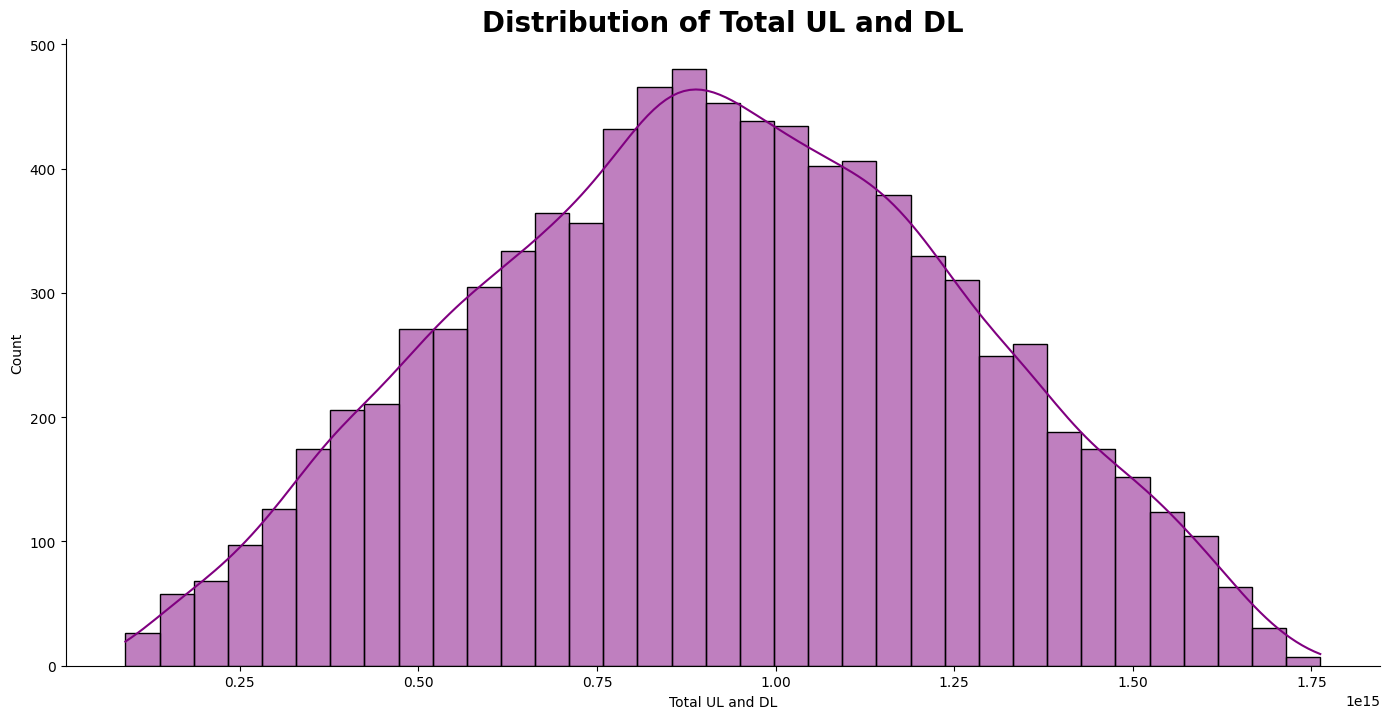

In [20]:
exploration.plot_hist(df, 'Total UL and DL', 'purple')

In [21]:
df.describe()['Total UL and DL']

count    8.747000e+03
mean     9.163393e+14
std      3.419210e+14
min      8.990077e+13
25%      6.687916e+14
50%      9.155821e+14
75%      1.163781e+15
max      1.762451e+15
Name: Total UL and DL, dtype: float64

# Youtube Total Data

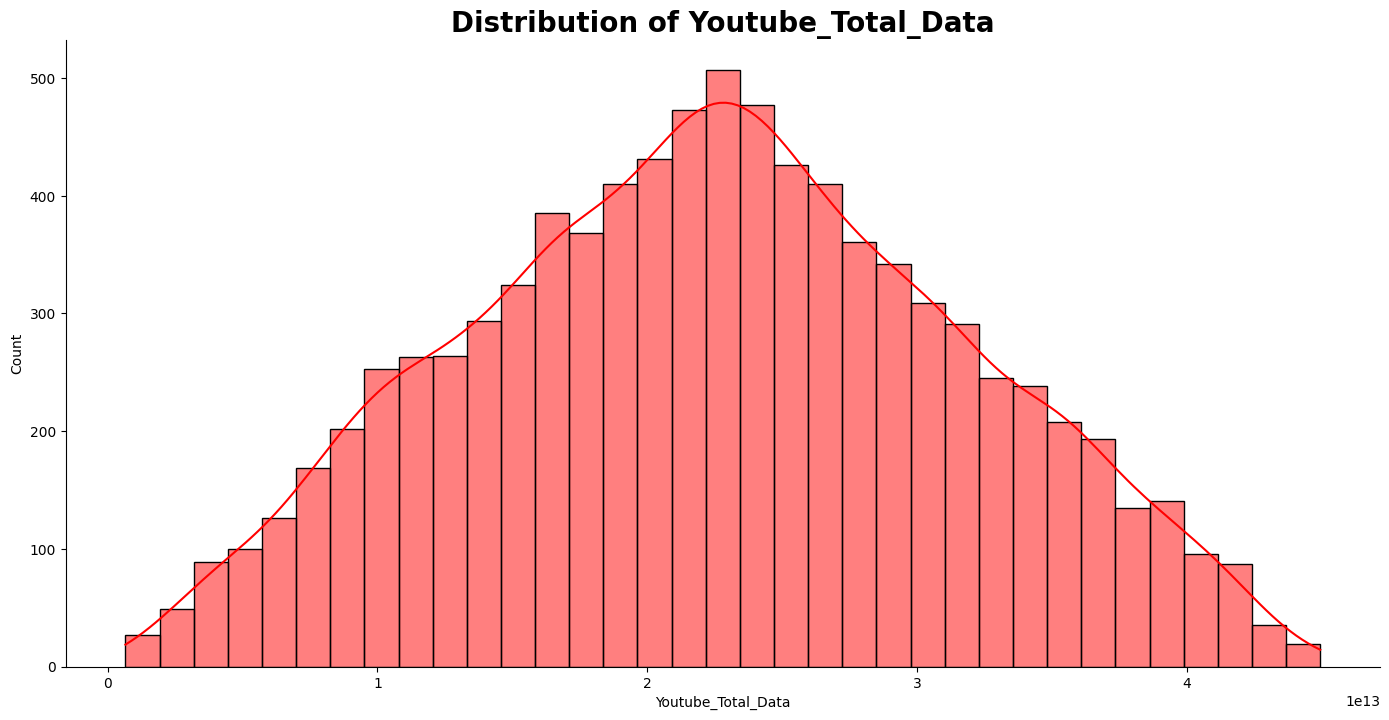

In [23]:
exploration.plot_hist(df, 'Youtube_Total_Data', 'red')

In [24]:
df.describe()['Youtube_Total_Data']

count    8.747000e+03
mean     2.252466e+13
std      9.179092e+12
min      6.578440e+11
25%      1.595518e+13
50%      2.250168e+13
75%      2.906280e+13
max      4.495095e+13
Name: Youtube_Total_Data, dtype: float64

# Google Total Data

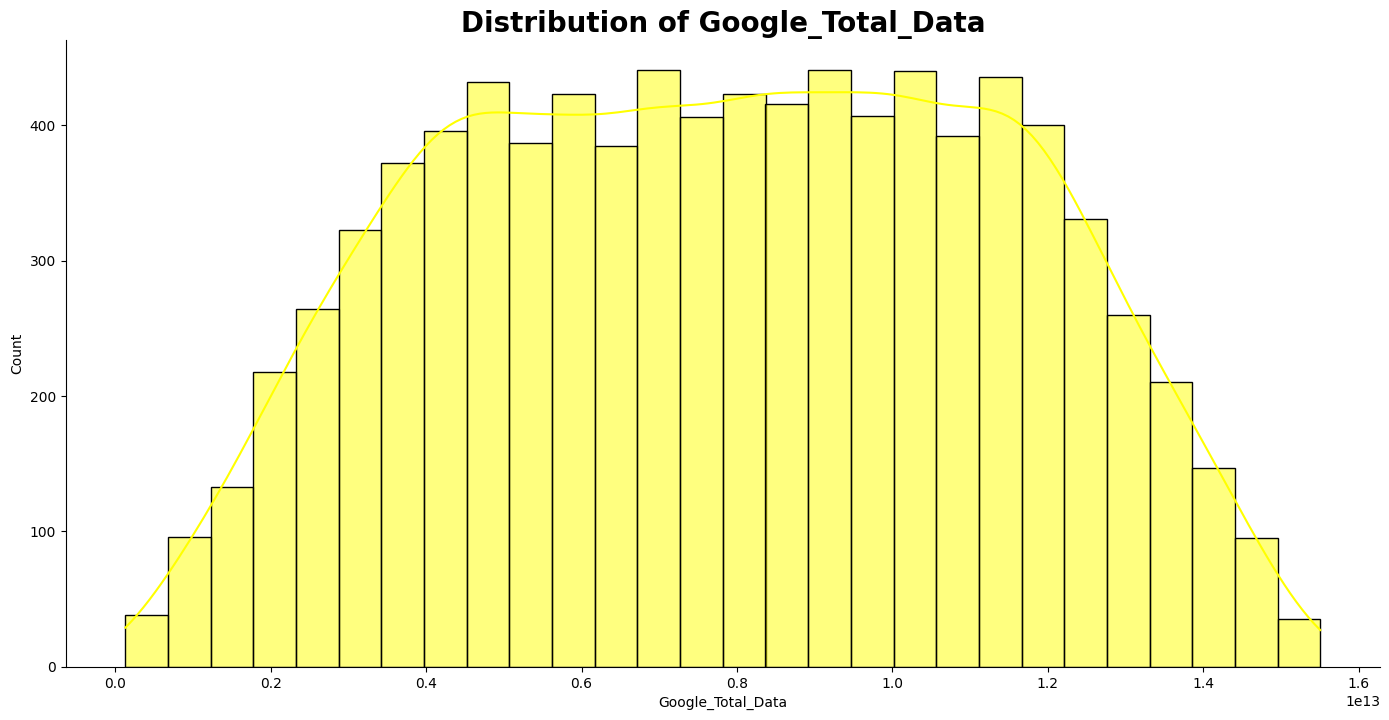

In [25]:
exploration.plot_hist(df, 'Google_Total_Data', 'yellow')

In [26]:
df.describe()['Google_Total_Data']

count    8.747000e+03
mean     7.857836e+12
std      3.518412e+12
min      1.295180e+11
25%      4.963092e+12
50%      7.904975e+12
75%      1.074233e+13
max      1.550645e+13
Name: Google_Total_Data, dtype: float64

# Email Total Data

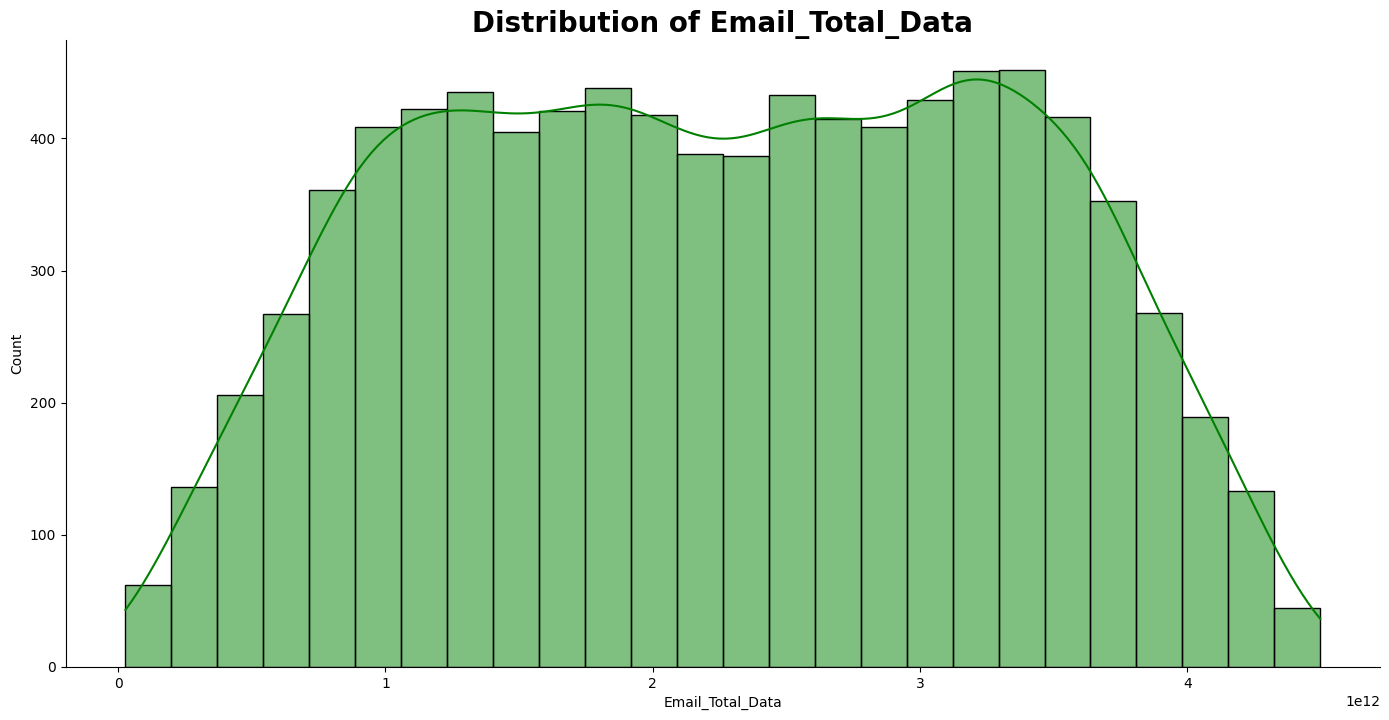

In [27]:
exploration.plot_hist(df, 'Email_Total_Data', 'green')

In [28]:
df.describe()['Email_Total_Data']

count    8.747000e+03
mean     2.259609e+12
std      1.072008e+12
min      2.675000e+10
25%      1.361233e+12
50%      2.265204e+12
75%      3.164643e+12
max      4.497701e+12
Name: Email_Total_Data, dtype: float64

# Social Media Total Data

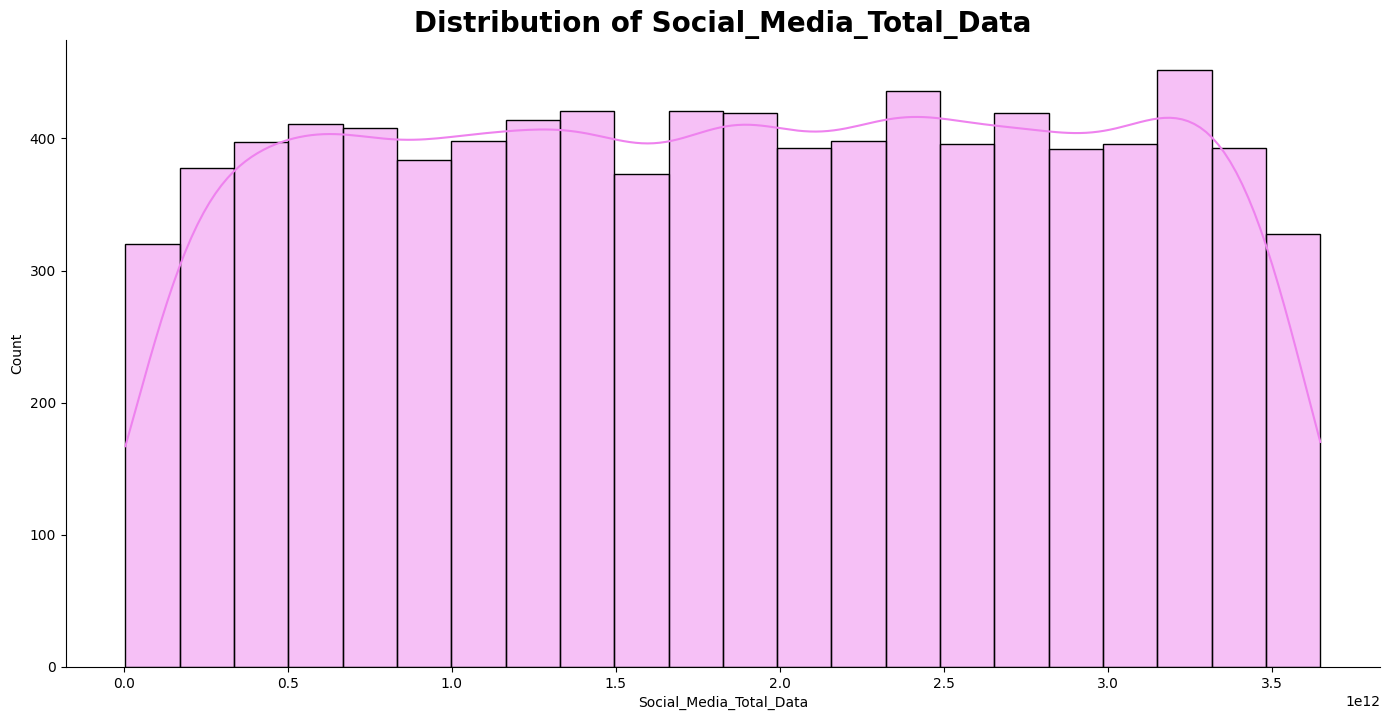

In [29]:
exploration.plot_hist(df, 'Social_Media_Total_Data', 'violet')

In [30]:
df.describe()['Social_Media_Total_Data']

count    8.747000e+03
mean     1.840155e+12
std      1.030364e+12
min      5.441000e+09
25%      9.581310e+11
50%      1.849296e+12
75%      2.731996e+12
max      3.647484e+12
Name: Social_Media_Total_Data, dtype: float64

# Netflix Total Data

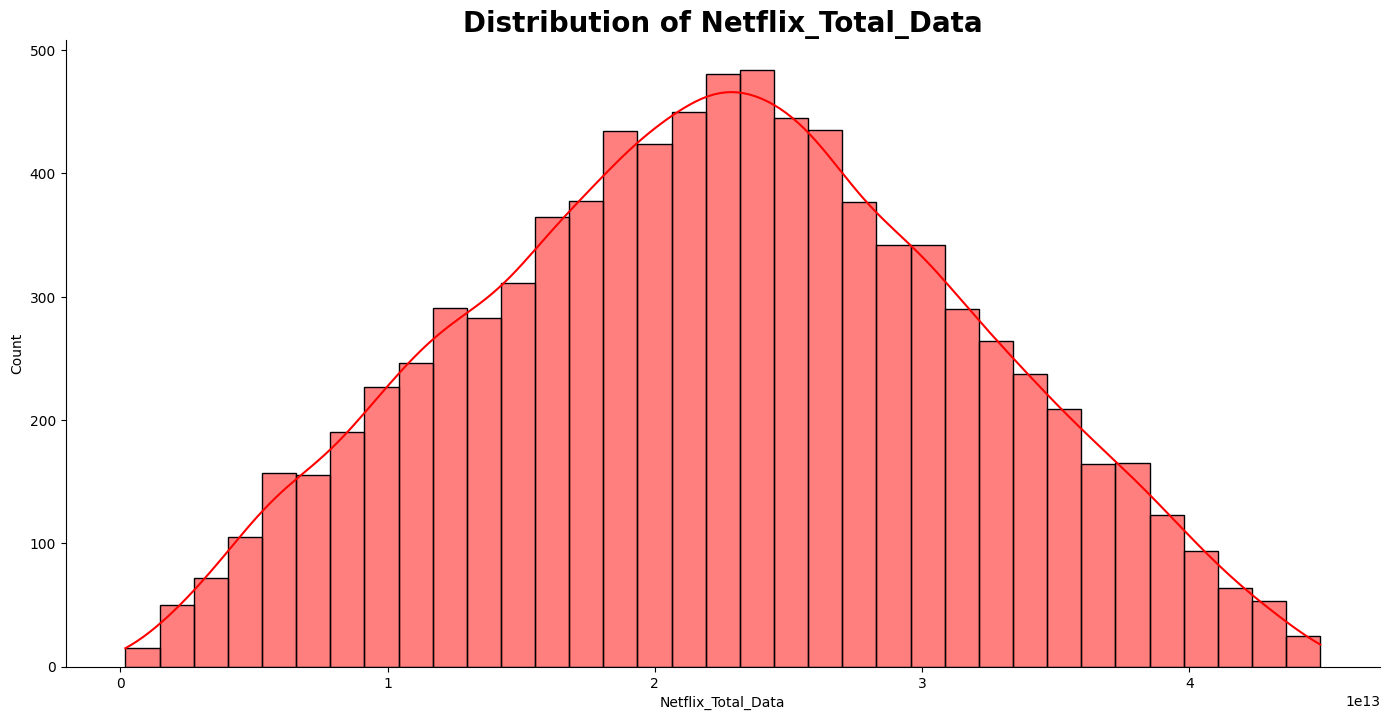

In [31]:
exploration.plot_hist(df, 'Netflix_Total_Data', 'red')

In [32]:
df.describe()['Netflix_Total_Data']

count    8.747000e+03
mean     2.240898e+13
std      9.215411e+12
min      1.864600e+11
25%      1.581271e+13
50%      2.247118e+13
75%      2.902785e+13
max      4.490332e+13
Name: Netflix_Total_Data, dtype: float64

# Gaming Total Data

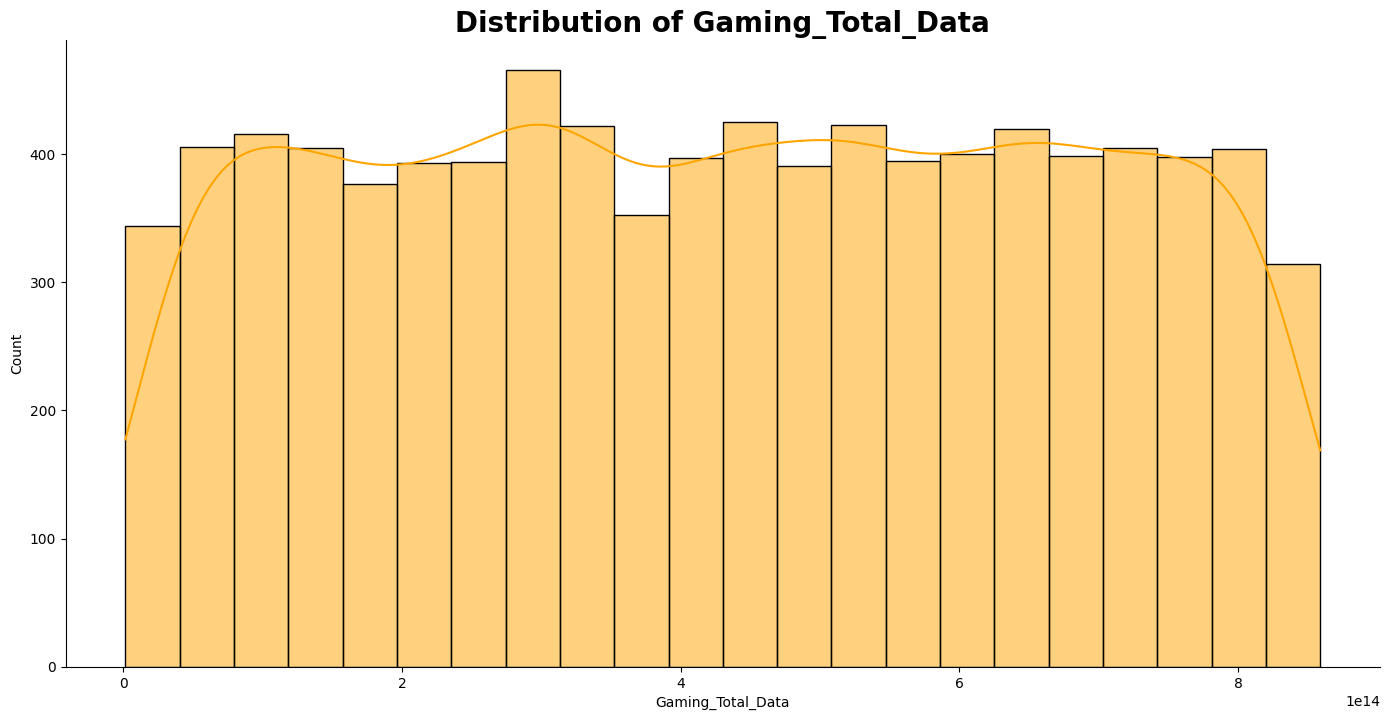

In [33]:
exploration.plot_hist(df, 'Gaming_Total_Data', 'orange')

In [34]:
df.describe()['Gaming_Total_Data']

count    8.747000e+03
mean     4.288084e+14
std      2.432991e+14
min      1.552874e+12
25%      2.211153e+14
50%      4.302372e+14
75%      6.404488e+14
max      8.589021e+14
Name: Gaming_Total_Data, dtype: float64

# Other Total Data

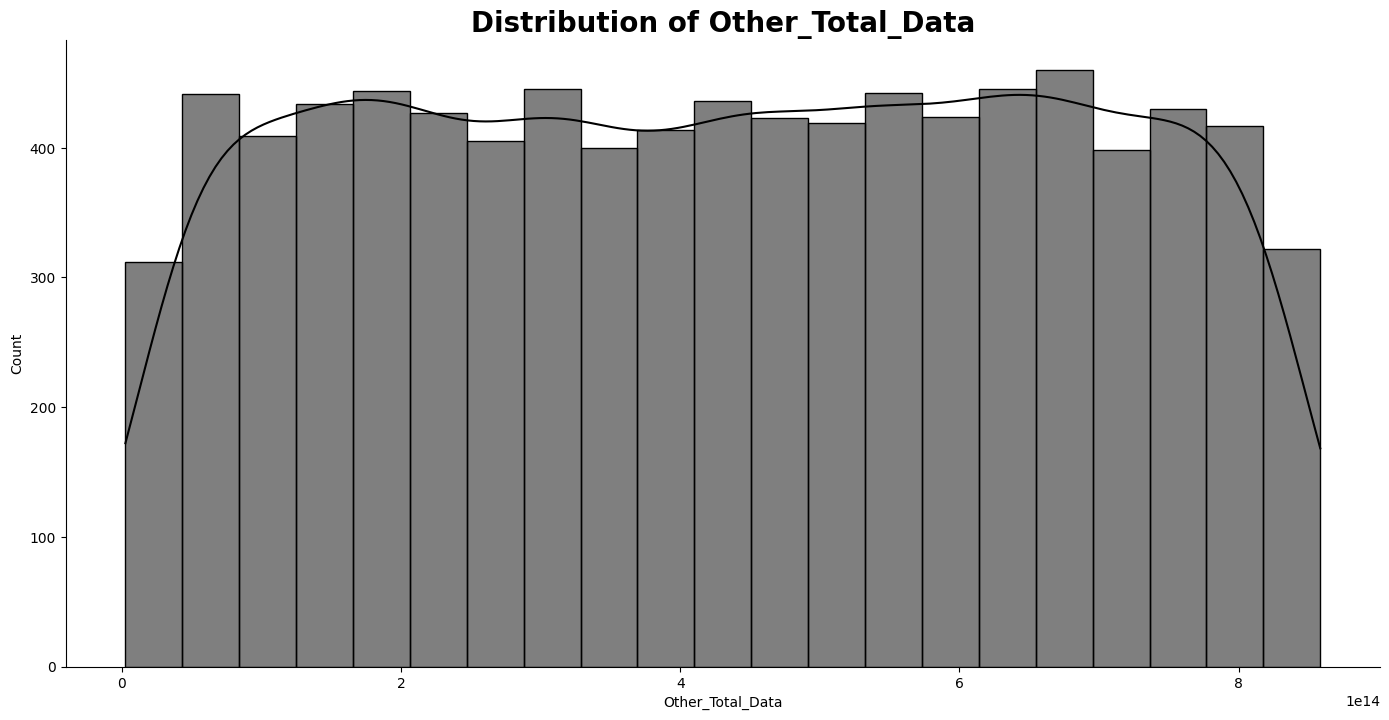

In [35]:
exploration.plot_hist(df, 'Other_Total_Data', 'black')

In [36]:
df.describe()['Other_Total_Data']

count    8.747000e+03
mean     4.306397e+14
std      2.413396e+14
min      2.451224e+12
25%      2.186194e+14
50%      4.337532e+14
75%      6.398706e+14
max      8.584707e+14
Name: Other_Total_Data, dtype: float64

# Bivariate Analysis

# Social media Vs Total UL DL

<Axes: xlabel='Social_Media_Total_Data', ylabel='Total UL and DL'>

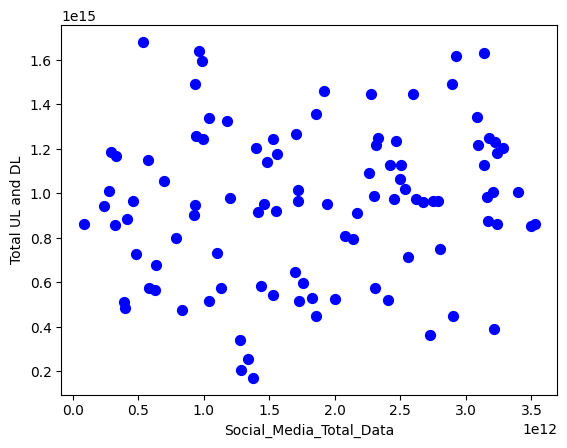

In [37]:
df[df['Social_Media_Total_Data'] > 1.729234e+06].sample(100).plot.scatter(x='Social_Media_Total_Data', y='Total UL and DL', c='blue', s=50)

# Youtube Total Data Vs Total UL and DL

<Axes: xlabel='Youtube_Total_Data', ylabel='Total UL and DL'>

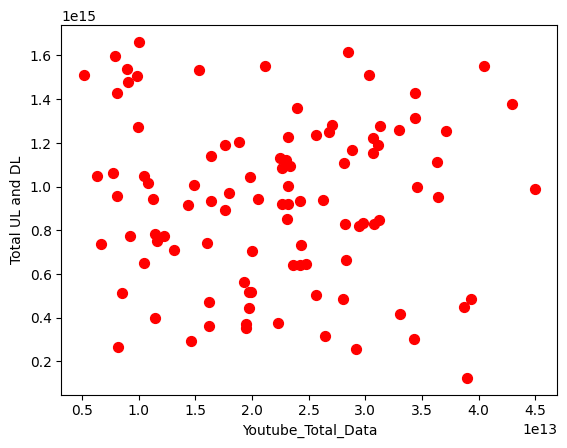

In [38]:
df[df['Youtube_Total_Data'] > 1.729234e+06].sample(100).plot.scatter(x='Youtube_Total_Data', y='Total UL and DL', c='red', s=50)

# Google Total Data Vs Total UL DL

<Axes: xlabel='Google_Total_Data', ylabel='Total UL and DL'>

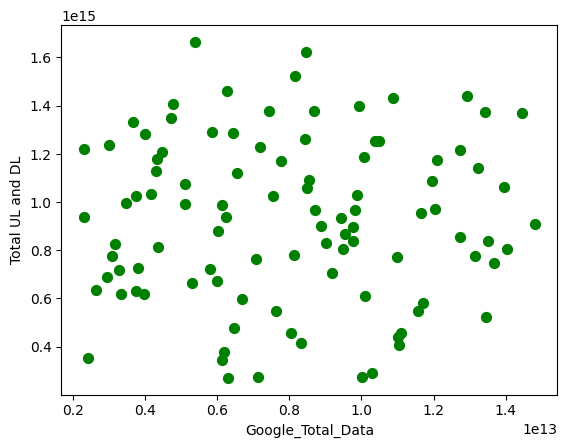

In [39]:
df[df['Google_Total_Data'] > 1.729234e+06].sample(100).plot.scatter(x='Google_Total_Data', y='Total UL and DL', c='green', s=50)

# Email Total Data Vs Total DL UL

<Axes: xlabel='Email_Total_Data', ylabel='Total UL and DL'>

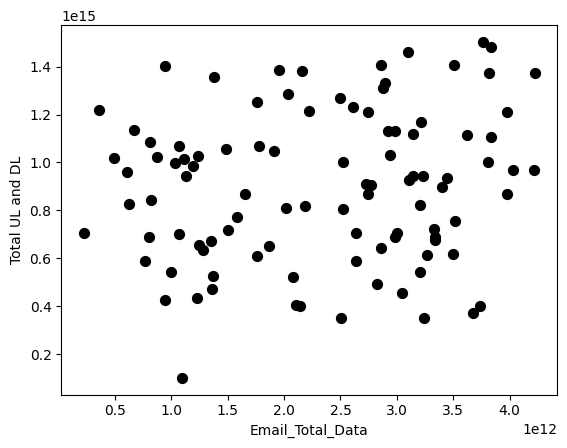

In [40]:
df[df['Email_Total_Data'] > 1.729234e+06].sample(100).plot.scatter(x='Email_Total_Data', y='Total UL and DL', c='black', s=50)

# Netflix Total Data vs Total UL and DL

<Axes: xlabel='Netflix_Total_Data', ylabel='Total UL and DL'>

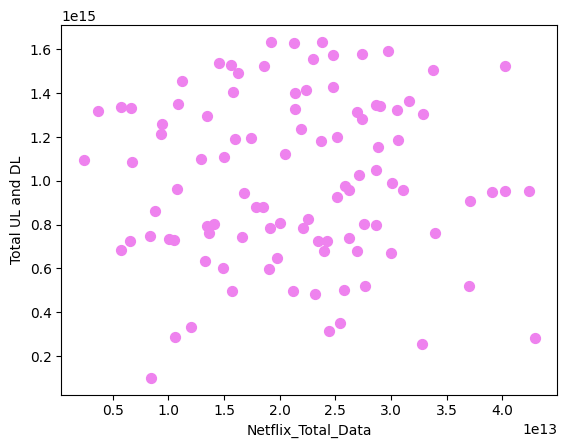

In [41]:
df[df['Netflix_Total_Data'] > 1.729234e+06].sample(100).plot.scatter(x='Netflix_Total_Data', y='Total UL and DL', c='violet', s=50)

# Gaming Total Data Vs Total UL DL

<Axes: xlabel='Gaming_Total_Data', ylabel='Total UL and DL'>

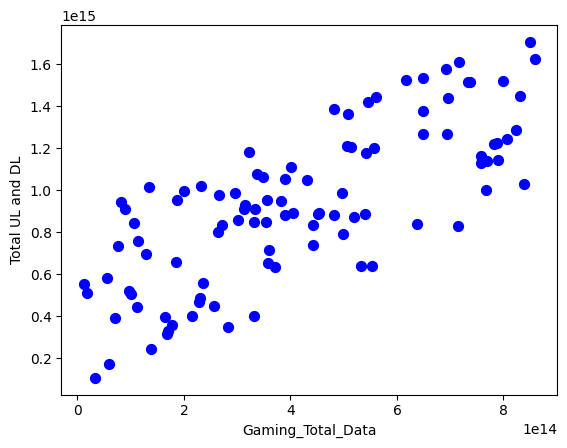

In [42]:
df[df['Gaming_Total_Data'] > 1.729234e+06].sample(100).plot.scatter(x='Gaming_Total_Data', y='Total UL and DL', c='blue', s=50)

# Other Total Data Vs Total UL DL

<Axes: xlabel='Other_Total_Data', ylabel='Total UL and DL'>

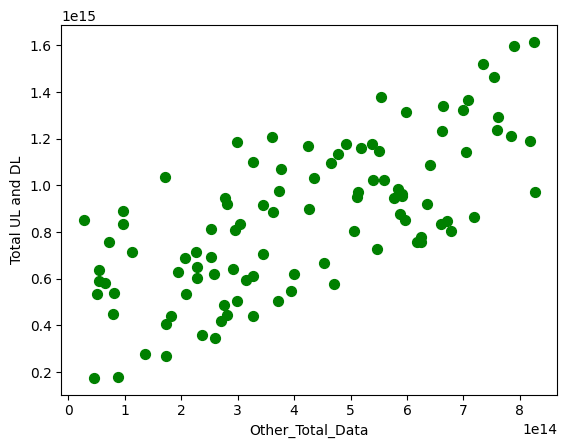

In [43]:
df[df['Other_Total_Data'] > 1.729234e+06].sample(100).plot.scatter(x='Other_Total_Data', y='Total UL and DL', c='green', s=50)

# Outlier
# Activity_Duration(ms)

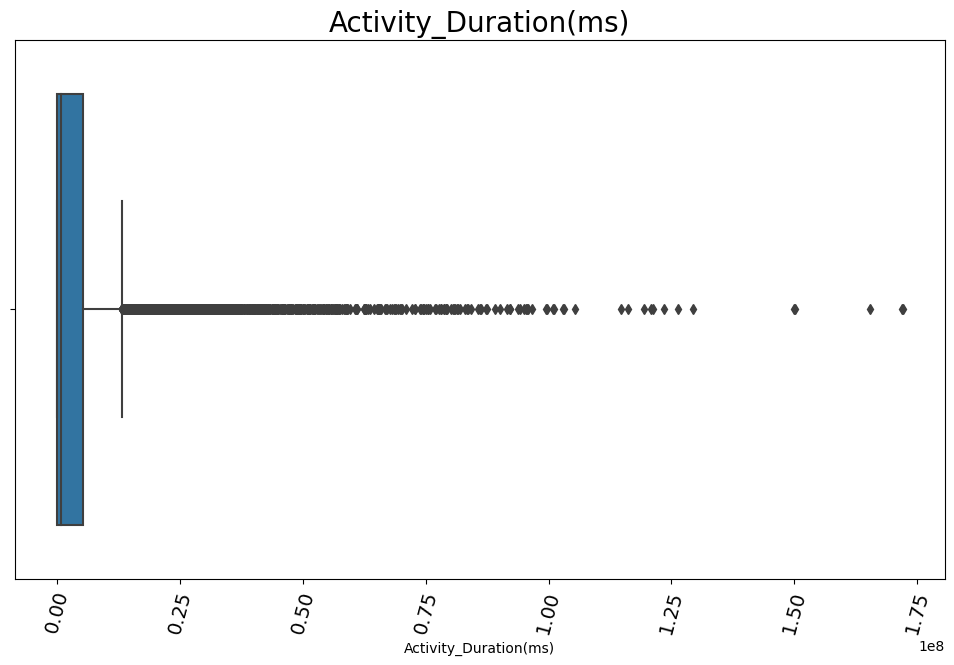

In [44]:
exploration.plot_box(df,'Activity_Duration(ms)' ,'Activity_Duration(ms)')

# Avg Delay (ms)

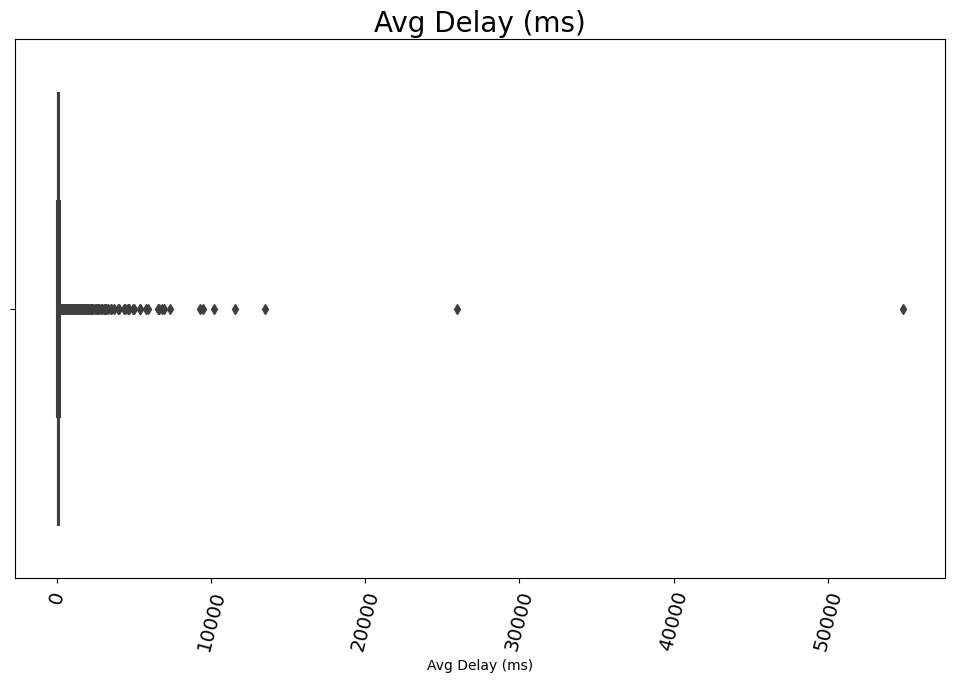

In [45]:
exploration.plot_box(df,'Avg Delay (ms)' ,'Avg Delay (ms)')

# Start time of XDR

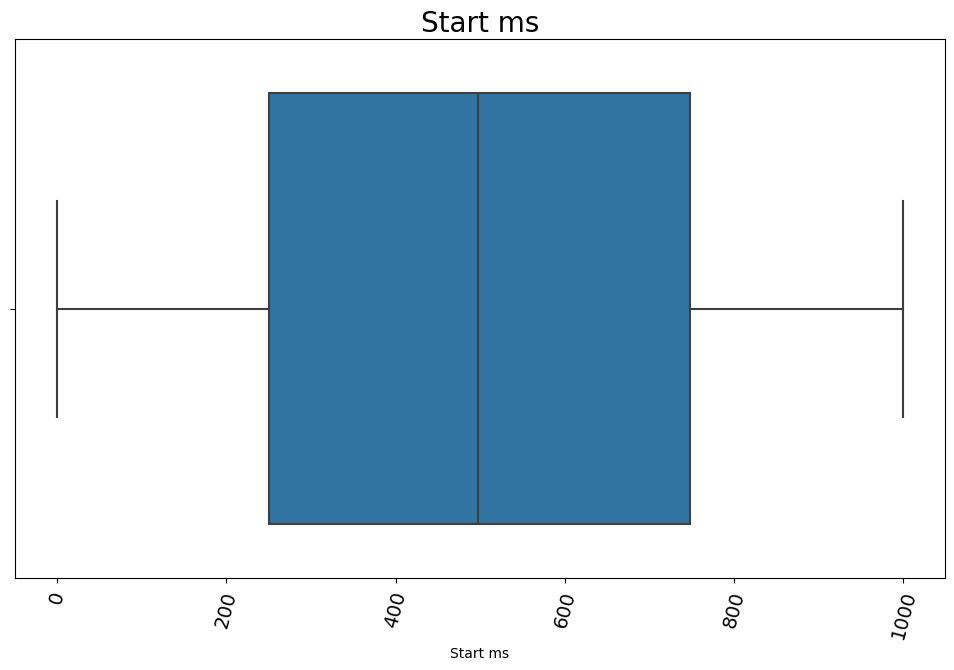

In [46]:
exploration.plot_box(df,'Start ms' ,'Start ms')

# Total duration of XDR session in ms

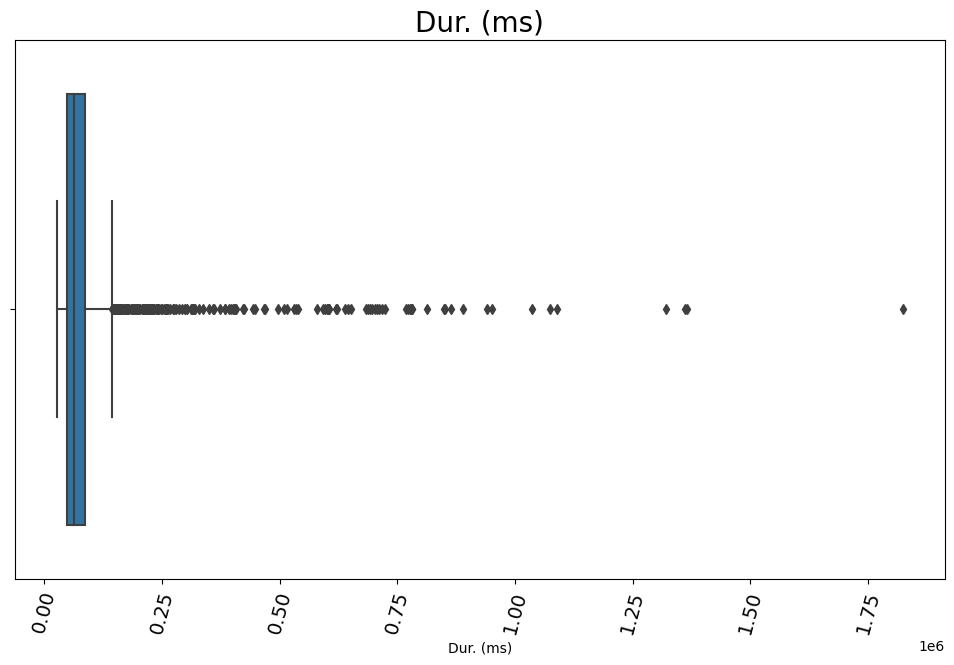

In [47]:
exploration.plot_box(df,'Dur. (ms)' ,'Dur. (ms)')

# Correlation

In [48]:
df.columns

Index(['MSISDN/Number', 'no.of xDR sessions', 'Total Uploads',
       'Total Downloads', 'Total UL and DL', 'Youtube_Total_Data',
       'Google_Total_Data', 'Email_Total_Data', 'Social_Media_Total_Data',
       'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data',
       'Start ms', 'End ms', 'Start', 'End', 'Avg Delay (ms)', 'Dur. (ms)',
       'Dur. (ms).1', 'Activity_Duration(ms)', 'Avg Throughput (kbps)',
       'Handset Manufacturer', 'Handset Type', 'Last Location Name', 'IMSI',
       'IMEI'],
      dtype='object')

In [49]:
combined = df[['Total Downloads', 'Youtube_Total_Data','Google_Total_Data','Email_Total_Data','Social_Media_Total_Data','Netflix_Total_Data','Gaming_Total_Data','Other_Total_Data']]
heat_map = combined.corr()

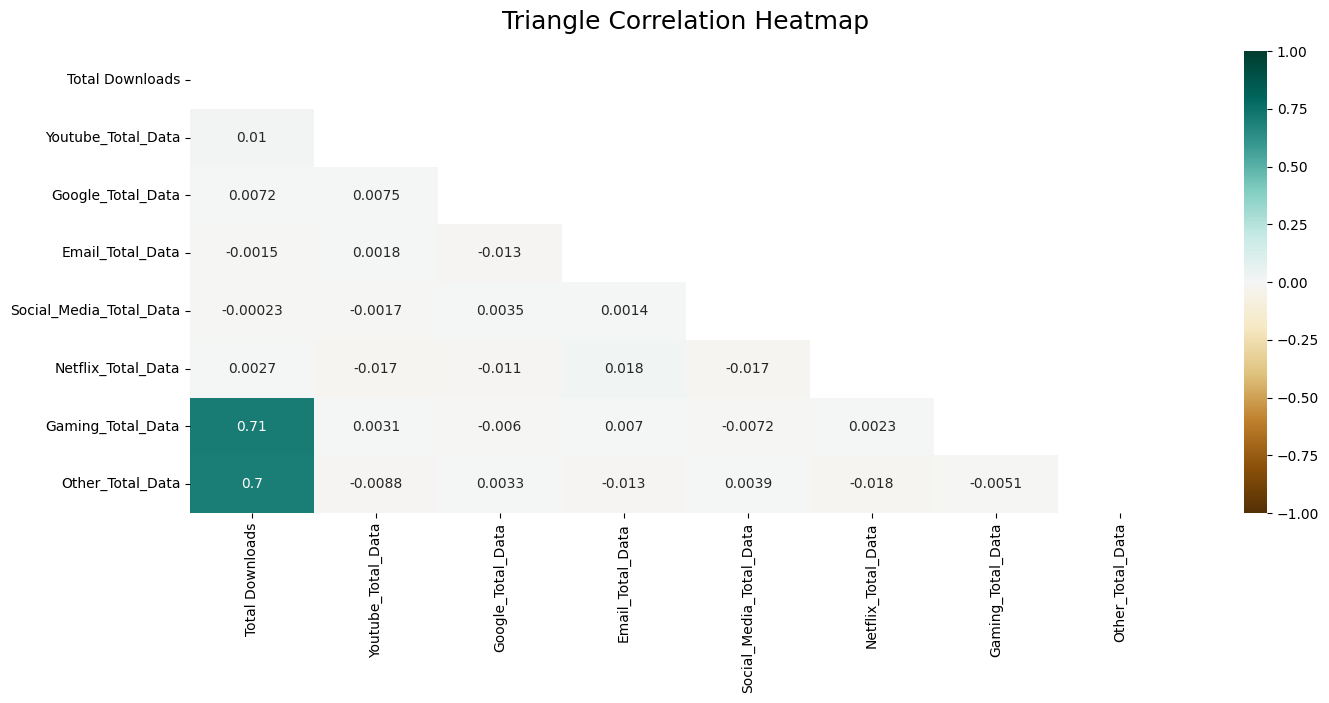

In [51]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(heat_map))
heatmap = sns.heatmap(heat_map, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

# Transformation

In [52]:
df.columns

Index(['MSISDN/Number', 'no.of xDR sessions', 'Total Uploads',
       'Total Downloads', 'Total UL and DL', 'Youtube_Total_Data',
       'Google_Total_Data', 'Email_Total_Data', 'Social_Media_Total_Data',
       'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data',
       'Start ms', 'End ms', 'Start', 'End', 'Avg Delay (ms)', 'Dur. (ms)',
       'Dur. (ms).1', 'Activity_Duration(ms)', 'Avg Throughput (kbps)',
       'Handset Manufacturer', 'Handset Type', 'Last Location Name', 'IMSI',
       'IMEI'],
      dtype='object')